# Naive Bayes

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**Load Data**

In [3]:
df = pd.read_csv("formated_data.csv")
df.head()
group = df.groupby(['max_sal','min_sal']).size()
print(group[40:])

max_sal  min_sal
180      120        186
         130          4
         150        146
         180         12
200      100        266
         120        131
         150        556
         180         37
         200         30
210      150          1
240      120          1
250      150        134
         180         71
         200        139
         250          2
270      180          1
298      150          1
300      150         99
         180         48
         200        134
         250         66
         300          7
325      175          1
350      250          1
400      200         84
         250         26
         300         41
         400          7
450      300          1
500      250         20
         300         50
         400         19
600      300          4
800      400          4
         500          5
1000     800          2
dtype: int64


**Labeling Data**

(array([1006.,    0.,    0., 1548.,    0.,    0., 1438.,    0.,    0.,
         967.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

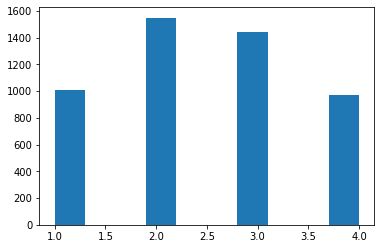

In [34]:
label = []
max_sal = df['max_sal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(1)
    elif i in range(150,175):
        label.append(2)
    elif i in range(175,250):
        label.append(3)
    else:
        label.append(4)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

**Getting X**

In [35]:
row_num = len(df)
col_num = len(df.iloc[0,:].to_numpy())
X= df.iloc[:,11:68].to_numpy().reshape(row_num,68-11)
print(X)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


**Splitting the data**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=120)

**Implement NB**

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
model = mnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.35685483870967744

In [32]:
1600/5000

0.32